In [3]:
import json
import datetime
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [4]:
# load json file
with open('em_data.txt') as json_file:  
    data = json.load(json_file)
print data['/node/139863']['user']
print data['/node/139863']['reply'][1]['user']

gracelyn
rosie43539


In [5]:
post_time = []
for key in data:
    t = data[key]['post_time']
    post_time.append(t)
    
    i = 0
    while i < 100:
        try:
            t = data[key]['reply'][i]['post_time']
            post_time.append(t)
        except:
            pass
        i += 1
print len(post_time)
print post_time[:10]

post_time1 = []
for time in post_time:
    month = time.split()[0]
    year = time.split(',')[1]
    time = month+year
    post_time1.append(time)
print len(post_time1)
print post_time1[:10]

post_time2 = []
for time in post_time:
    year = time.split(', ')[1]
    post_time2.append(year)
print len(post_time2)
print post_time2[:10]

8047
[u'Sep 30, 2012 ', u'Sep 30, 2012 ', u'Oct 04, 2012 ', u'Oct 06, 2012 ', u'Oct 07, 2012 ', u'Oct 11, 2012 ', u'Oct 12, 2012 ', u'Oct 12, 2012 ', u'Oct 14, 2012 ', u'Jan 29, 2011 ']
8047
[u'Sep 2012 ', u'Sep 2012 ', u'Oct 2012 ', u'Oct 2012 ', u'Oct 2012 ', u'Oct 2012 ', u'Oct 2012 ', u'Oct 2012 ', u'Oct 2012 ', u'Jan 2011 ']
8047
[u'2012 ', u'2012 ', u'2012 ', u'2012 ', u'2012 ', u'2012 ', u'2012 ', u'2012 ', u'2012 ', u'2011 ']


In [6]:
#count = Counter(post_time1)
count = Counter(post_time2)
count

Counter({u'2000 ': 31,
         u'2001 ': 103,
         u'2002 ': 247,
         u'2003 ': 251,
         u'2004 ': 251,
         u'2005 ': 176,
         u'2006 ': 133,
         u'2007 ': 143,
         u'2008 ': 750,
         u'2009 ': 2264,
         u'2010 ': 1615,
         u'2011 ': 1165,
         u'2012 ': 458,
         u'2013 ': 217,
         u'2014 ': 126,
         u'2015 ': 98,
         u'2016 ': 19})

In [58]:
index = pd.date_range('7/1/2000','4/1/2016', freq='MS')

In [51]:
y = []
for year in range(2000, 2017):
    for month in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y.append(count[month+' '+str(year)+' '])
        #print count[month+' '+str(year)+' ']
        #print month+' '+str(year)
y = y[6:196]
print len(y)

190


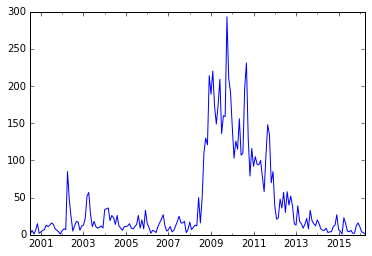

In [55]:
ts = pd.Series(y, index)
ts.plot()

In [63]:
df = pd.DataFrame({'time':index, 'count':y})
df.head()

,count,time
0,1,2000-07-01
1,6,2000-08-01
2,1,2000-09-01
3,6,2000-10-01
4,15,2000-11-01


C:\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  if __name__ == '__main__':


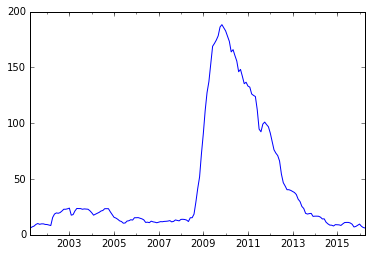

In [77]:
df['10MA'] = pd.rolling_mean(df['count'], 10)
df1 = df[9:]
ts = pd.Series(df1['10MA'].tolist(), df1['time'].tolist())
ts.plot()

In [12]:
#index = pd.date_range('2000', '2017', freq='A')

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

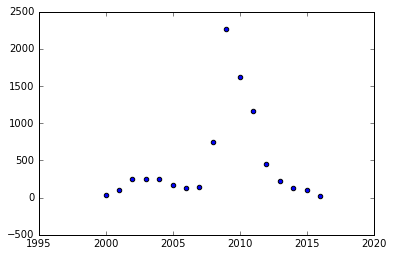

In [16]:
x = []
y = []
for key in count:
    x.append(key)
    y.append(count[key])
plt.scatter(x,y)

# Construct a series of networks

In [15]:
# define time windows
# frequency=one year, 901, g02, ... g15
def extract_digraph(t):
    g = nx.DiGraph()
    for key in data:
        i = 0
        while i < 100:
            try:
                if data[key]['user'] != data[key]['reply'][i]['user'] and data[key]['reply'][i]['post_time'].split(', ')[1]  == t+' ':
                    g.add_edge(data[key]['reply'][i]['user'], data[key]['user'])
            except:
                pass
            i += 1
    return g

def extract_graph(t):
    g = nx.Graph()
    for key in data:
        i = 0
        while i < 100:
            try:
                if data[key]['user'] != data[key]['reply'][i]['user'] and data[key]['reply'][i]['post_time'].split(', ')[1]  == t+' ':
                    g.add_edge(data[key]['reply'][i]['user'], data[key]['user'])
            except:
                pass
            i += 1
    return g

# frequency=half a year, 901, g02, ... g30
  
def extract_graph(m, y):
    g = nx.Graph()
    for key in data:
        i = 0
        while i < 100:
            try:
                if data[key]['user'] != data[key]['reply'][i]['user'] and data[key]['reply'][i]['post_time'].split()[0] in m and data[key]['reply'][i]['post_time'].split(', ')[1] == y+' ':
                    g.add_edge(data[key]['reply'][i]['user'], data[key]['user'])
            except:
                pass
            i += 1
    return g

In [5]:
#construct a series of graphs
graphs = []
for i in range(2001, 2016):
    g = extract_graph(str(i))    
    graphs.append(g)

In [12]:
cc = []
for g in graphs:
    c = nx.average_clustering(g)
    cc.append(c)
print len(cc)

15


In [10]:
# define retaining(dropout) rate
users = []
for g in graphs:
    s = set()
    for node in g:
        s.add(node)
    users.append(s)
print len(users)

retain = []
for i in range(14):
    r = len(users[i]&users[i+1])/float(len(users[i]))
    retain.append(r)
print len(retain)

15
14


In [11]:
retain

[0.17857142857142858,
 0.1935483870967742,
 0.10810810810810811,
 0.09154929577464789,
 0.11458333333333333,
 0.1875,
 0.21052631578947367,
 0.2608695652173913,
 0.1879432624113475,
 0.12968299711815562,
 0.14453125,
 0.11538461538461539,
 0.1388888888888889,
 0.16666666666666666]

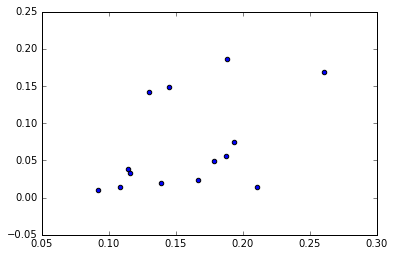

In [13]:
plt.scatter(retain, cc[:14])

In [19]:
first = set(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
second = set(['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
graphs1 = []
for i in range(2001, 2016):
    g = extract_graph(first, str(i))    
    graphs1.append(g)

graphs2 = []
for i in range(2001, 2016):
    g = extract_graph(second, str(i))    
    graphs2.append(g)    

In [23]:
print nx.info(graphs1[1])
print nx.info(graphs2[1])
print len(graphs1)
print len(graphs2)

Name: 
Type: Graph
Number of nodes: 70
Number of edges: 106
Average degree:   3.0286
Name: 
Type: Graph
Number of nodes: 30
Number of edges: 34
Average degree:   2.2667
15
15


In [35]:
graphs = []
for i in range(15):
    graphs.append(graphs1[i])
    graphs.append(graphs2[i])
len(graphs)

30

In [39]:
cc = []
for g in graphs:
    c = nx.average_clustering(g)
    cc.append(c)
print len(cc)

users = []
for g in graphs:
    s = set()
    for node in g:
        s.add(node)
    users.append(s)
print len(users)

retain = []
for i in range(29):
    r = len(users[i]&users[i+1])/float(len(users[i]))
    retain.append(r)
print len(retain)

30
30
29


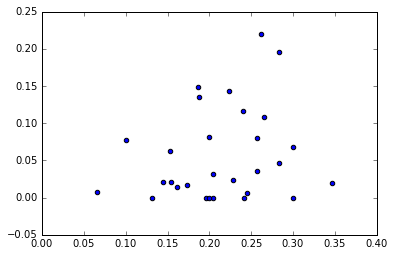

In [40]:
plt.scatter(retain, cc[:29])

In [41]:
retain

[0.2571428571428571,
 0.3,
 0.1,
 0.3,
 0.0660377358490566,
 0.20408163265306123,
 0.17346938775510204,
 0.13114754098360656,
 0.1956521739130435,
 0.15254237288135594,
 0.2,
 0.2,
 0.22857142857142856,
 0.24489795918367346,
 0.3469387755102041,
 0.2830188679245283,
 0.26119402985074625,
 0.22404371584699453,
 0.24019607843137256,
 0.1875,
 0.26490066225165565,
 0.18620689655172415,
 0.2571428571428571,
 0.14423076923076922,
 0.15384615384615385,
 0.2830188679245283,
 0.20454545454545456,
 0.16129032258064516,
 0.2413793103448276]